In [4]:
import os

# Path ke folder
folder = r"C:/Users/DELL/Pictures/new-cricap-main/KOTA BATU/KOTA BATU"

# List semua file & folder
all_files = os.listdir(folder)

print("Isi folder:", folder)
for f in all_files:
    print("-", f)


Isi folder: C:/Users/DELL/Pictures/new-cricap-main/KOTA BATU/KOTA BATU
- ADMINISTRASIDESA_AR_25K.cpg
- ADMINISTRASIDESA_AR_25K.dbf
- ADMINISTRASIDESA_AR_25K.prj
- ADMINISTRASIDESA_AR_25K.sbn
- ADMINISTRASIDESA_AR_25K.sbx
- ADMINISTRASIDESA_AR_25K.shp
- ADMINISTRASIDESA_AR_25K.shp.xml
- ADMINISTRASIDESA_AR_25K.shx
- ADMINISTRASI_LN_25K.cpg
- ADMINISTRASI_LN_25K.dbf
- ADMINISTRASI_LN_25K.prj
- ADMINISTRASI_LN_25K.sbn
- ADMINISTRASI_LN_25K.sbx
- ADMINISTRASI_LN_25K.shp
- ADMINISTRASI_LN_25K.shp.xml
- ADMINISTRASI_LN_25K.shx
- AGRIKEBUN_AR_25K.cpg
- AGRIKEBUN_AR_25K.dbf
- AGRIKEBUN_AR_25K.prj
- AGRIKEBUN_AR_25K.sbn
- AGRIKEBUN_AR_25K.sbx
- AGRIKEBUN_AR_25K.shp
- AGRIKEBUN_AR_25K.shp.xml
- AGRIKEBUN_AR_25K.shx
- AGRILADANG_AR_25K.cpg
- AGRILADANG_AR_25K.dbf
- AGRILADANG_AR_25K.prj
- AGRILADANG_AR_25K.sbn
- AGRILADANG_AR_25K.sbx
- AGRILADANG_AR_25K.shp
- AGRILADANG_AR_25K.shp.xml
- AGRILADANG_AR_25K.shx
- AGRISAWAH_AR_25K.cpg
- AGRISAWAH_AR_25K.dbf
- AGRISAWAH_AR_25K.prj
- AGRISAWAH_AR_25K.s

Kolom atribut: Index(['KDPPUM', 'NAMOBJ', 'REMARK', 'KDPBPS', 'FCODE', 'LUASWH', 'UUPP',
       'SRS_ID', 'LCODE', 'METADATA', 'KDEBPS', 'KDEPUM', 'KDCBPS', 'KDCPUM',
       'KDBBPS', 'KDBPUM', 'WADMKD', 'WIADKD', 'WADMKC', 'WIADKC', 'WADMKK',
       'WIADKK', 'WADMPR', 'WIADPR', 'TIPADM', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')
  KDPPUM          NAMOBJ                               REMARK KDPBPS FCODE  \
0   None  AREA KEHUTANAN  Wilayah Administrasi Keluruhan/Desa   None  None   
1   None      AMPELDENTO  Wilayah Administrasi Keluruhan/Desa   None  None   
2   None         TLEKUNG  Wilayah Administrasi Keluruhan/Desa   None  None   
3   None       DADAPREJO  Wilayah Administrasi Keluruhan/Desa   None  None   
4   None          PENDEM  Wilayah Administrasi Keluruhan/Desa   None  None   

   LUASWH  UUPP SRS_ID   LCODE METADATA  ...       WADMKC WIADKC  WADMKK  \
0     0.0  None   None  BA0020     None  ...          DAU   None  MALANG   
1     0.0  None   

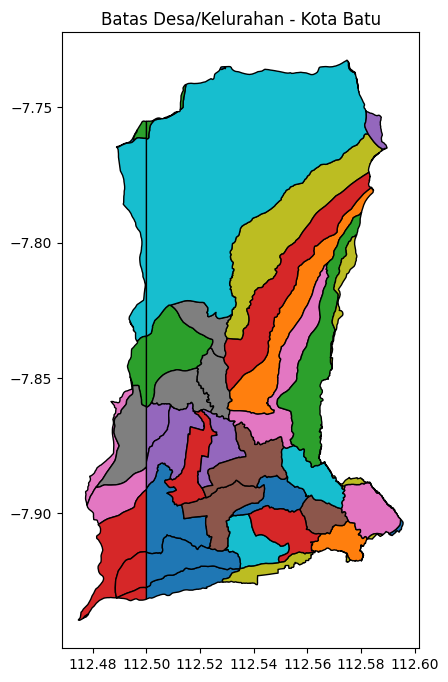

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path shapefile batas desa
desa_shp = r"C:/Users/DELL/Pictures/new-cricap-main/KOTA BATU/KOTA BATU/ADMINISTRASIDESA_AR_25K.shp"

# Load shapefile
gdf = gpd.read_file(desa_shp)

# Lihat kolom yang ada
print("Kolom atribut:", gdf.columns)
print(gdf.head())

# Plot peta dengan batas per desa
fig, ax = plt.subplots(figsize=(10,8))
gdf.plot(ax=ax, column="NAMOBJ", legend=False, edgecolor="black")

plt.title("Batas Desa/Kelurahan - Kota Batu")
plt.show()


In [ ]:
print("Jumlah data di shapefile:", len(gdf))
print("Jumlah data di JSON:", len(desa_df))
print("Jumlah data setelah merge:", len(gdf_merged))

print("Contoh nama desa di shapefile:", gdf["NAMOBJ"].unique()[:10])
print("Contoh nama desa di JSON:", desa_df["nama"].unique()[:10])



Jumlah data di shapefile: 48
Jumlah data di JSON: 24
Jumlah data setelah merge: 0
Contoh nama desa di shapefile: ['AREA KEHUTANAN' 'AMPELDENTO' 'TLEKUNG' 'DADAPREJO' 'PENDEM' 'MOJOREJO'
 'GIRIMOYO' 'BEJI' 'TEGALGONDO' 'ORO-OROOMBO']
Contoh nama desa di JSON: ['Oro-oro Ombo' 'Pesanggrahan' 'Sidomuyo' 'Sumberejo' 'Ngaglik' 'Sisir'
 'Songgokerto' 'Temas' 'Bulukerto' 'Bumiaji']
Jumlah data setelah merge: 19


In [10]:
# Normalisasi nama jadi huruf besar tanpa spasi di depan/belakang
gdf["NAMOBJ_clean"] = gdf["NAMOBJ"].str.strip().str.upper()
desa_df["nama_clean"] = desa_df["nama"].str.strip().str.upper()

# Merge pakai kolom normalisasi
gdf_merged = gdf.merge(desa_df, left_on="NAMOBJ_clean", right_on="nama_clean")

print("Jumlah data setelah merge:", len(gdf_merged))


Jumlah data setelah merge: 19


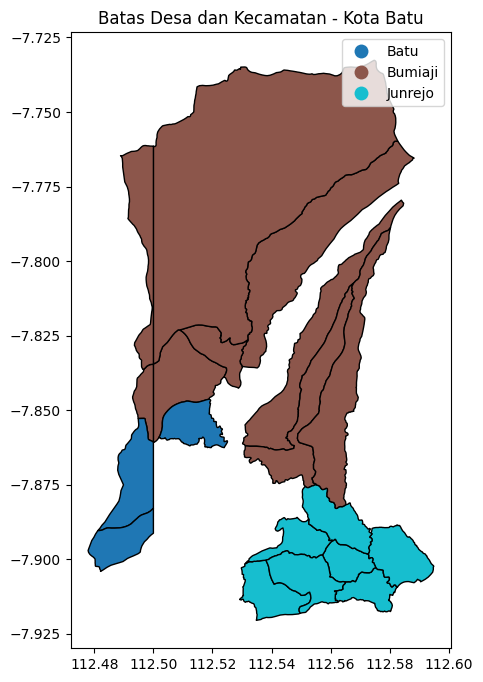

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
gdf_merged.plot(ax=ax, column="kecamatan", legend=True, edgecolor="black")

plt.title("Batas Desa dan Kecamatan - Kota Batu")
plt.show()


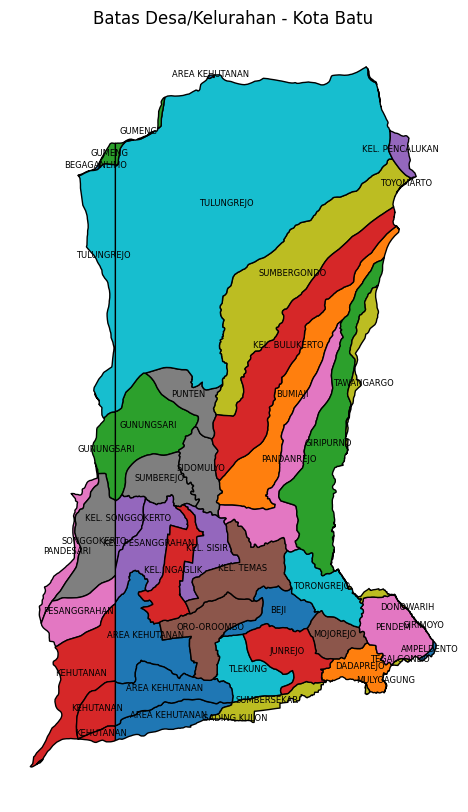

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path shapefile desa
desa_shp = r"C:/Users/DELL/Pictures/new-cricap-main/KOTA BATU/KOTA BATU/ADMINISTRASIDESA_AR_25K.shp"

# Load shapefile
gdf = gpd.read_file(desa_shp)

# Plot peta per desa
fig, ax = plt.subplots(figsize=(12,10))
gdf.plot(ax=ax, column="NAMOBJ", legend=False, edgecolor="black")

# Tambahkan nama desa di titik tengah (centroid)
for idx, row in gdf.iterrows():
    plt.annotate(
        text=row["NAMOBJ"],            # nama desa
        xy=(row["geometry"].centroid.x, row["geometry"].centroid.y),
        ha="center", fontsize=6, color="black"
    )

plt.title("Batas Desa/Kelurahan - Kota Batu")
plt.axis("off")
plt.show()


In [1]:
import geopandas as gpd
import folium
import json

# Load shapefile
desa_shp = r"C:/Users/DELL/Pictures/new-cricap-main/KOTA BATU/KOTA BATU/ADMINISTRASIDESA_AR_25K.shp"
gdf = gpd.read_file(desa_shp)

# Pastikan kolom yang dipakai ada
print(gdf.columns)  # biasanya 'NAMOBJ' untuk desa, 'WADMKC' atau 'KECAMATAN' untuk kecamatan

# Convert ke GeoJSON (langsung dari GeoDataFrame)
geojson_data = gdf.to_json()

# Buat peta dasar
m = folium.Map(location=[-7.87, 112.53], zoom_start=12, tiles="cartodbpositron")

# Fungsi bikin warna unik
def string_to_color(s):
    return "#{:06x}".format(abs(hash(s)) % 0xFFFFFF)

# Layer per desa
desa_layer = folium.FeatureGroup(name="Per Desa").add_to(m)
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        'fillColor': string_to_color(feature['properties']['NAMOBJ']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6,
    },
    tooltip=folium.GeoJsonTooltip(fields=["NAMOBJ", "WADMKC"], aliases=["Desa:", "Kecamatan:"])
).add_to(desa_layer)

# Layer per kecamatan
kec_layer = folium.FeatureGroup(name="Per Kecamatan").add_to(m)
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        'fillColor': string_to_color(feature['properties']['WADMKC']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6,
    },
    tooltip=folium.GeoJsonTooltip(fields=["NAMOBJ", "WADMKC"], aliases=["Desa:", "Kecamatan:"])
).add_to(kec_layer)

# Tambahkan kontrol layer (dropdown)
folium.LayerControl(collapsed=False).add_to(m)

# Simpan ke HTML
m.save("peta_kota_batu.html")
print("Peta berhasil dibuat: peta_kota_batu.html")


Index(['KDPPUM', 'NAMOBJ', 'REMARK', 'KDPBPS', 'FCODE', 'LUASWH', 'UUPP',
       'SRS_ID', 'LCODE', 'METADATA', 'KDEBPS', 'KDEPUM', 'KDCBPS', 'KDCPUM',
       'KDBBPS', 'KDBPUM', 'WADMKD', 'WIADKD', 'WADMKC', 'WIADKC', 'WADMKK',
       'WIADKK', 'WADMPR', 'WIADPR', 'TIPADM', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')
Peta berhasil dibuat: peta_kota_batu.html
